# Introdução

A seguir serão análisados os dados dos participantes paraibanos no ENEM 2019. Vale ressaltar que os dados utilizados nas análises a seguir serão oriundas de uma amostra reduzida da base de dados original que contém os dados completos de todos os participantes do ENEM 2019. Portanto, as conclusões exergadas nas análises não poderá representar fielmente todas as características presentes caso utilizasse os dados completos.

Porém, como essa é uma atividade com o intuito de praticar os conhecimentos vistos durante a 2ª Imersão de Dados promovido pela Alura, utilizar uma amostra de dados reduzida já serve como boa referência para aplicar as técnicas e ferramentas para a análide de dados.

# Parte 1 - Análise de dados

In [63]:
# Bibliotecas usadas para a análise de dados

import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

# Bibliotecas usadas para Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [64]:
# Base de dados

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


**1 - Quantos são os participantes da Paraíba na amostra de dados utilizada?**

In [65]:
dados_pb = dados.query("SG_UF_RESIDENCIA == 'PB'")
dados_pb.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
8429,190001336089,2019,2511202,Pedras de Fogo,25,PB,17,F,1,3,1,2511202.0,Pedras de Fogo,25.0,PB,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABACEBCECACBCDAACBAEBADCCCEBBEDACEDAEDEDABEAE,BBDED99999ADCBACEECDCBECADDCEACABDDDADEDECACEB...,EACDAEBCDAEBACEABAECDABBBCDAEEACDBCEACEABDDCE,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,160.0,160.0,180.0,100.0,740.0,B,E,C,B,7,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
8598,190001343250,2019,2513158,Santa Cecília,25,PB,18,M,1,1,1,3548708.0,São Bernardo do Campo,35.0,SP,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,A,4,B,A,B,A,A,B,B,B,B,A,A,A,A,B,A,A,C,A,A,B
8699,190001346815,2019,2511202,Pedras de Fogo,25,PB,23,M,1,3,1,2611606.0,Recife,26.0,PE,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,F,F,F,5,C,A,B,D,A,B,B,A,A,A,B,A,A,C,A,A,D,A,A,B
9007,190001360033,2019,2507903,Juripiranga,25,PB,20,F,1,3,1,3304557.0,Rio de Janeiro,33.0,RJ,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CBCCDBDCCAECBEECEECECBECBDBCAACCAAEBCDBDEDCEB,99999CBAAEBCEABEDBECDACECBAEEDDCDCCBEBAACDBAEC...,CBAEADAEBCCBABCBAD*DCCCADAEDCACBCBDCACBEAEDBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,140.0,160.0,160.0,160.0,120.0,740.0,D,B,A,C,5,A,A,C,D,A,A,B,A,A,A,A,A,A,B,B,A,E,A,A,B
9435,190001378185,2019,2517001,Umbuzeiro,25,PB,25,F,1,3,0,NaN,NaN,NaN,NaN,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,3,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B


In [66]:
dados_pb["SG_UF_RESIDENCIA"].value_counts()

PB    3690
Name: SG_UF_RESIDENCIA, dtype: int64

A amostra traz 3690 particpantes paraibanos.

**2 - Qual a distribuíção dos participantes por municipio paraibano?**

In [67]:
dados_pb["NO_MUNICIPIO_RESIDENCIA"].value_counts()

João Pessoa           958
Campina Grande        527
Patos                 102
Bayeux                 92
Santa Rita             90
                     ... 
Zabelê                  1
Curral Velho            1
Ouro Velho              1
Camalaú                 1
São José do Bonfim      1
Name: NO_MUNICIPIO_RESIDENCIA, Length: 216, dtype: int64

Apesar de usar um universo de 3690 participantes paraibanos nas análises, olhando a distribuição dessas pessoas de acordo com o município em que moram, as cinco primeiras cidades listadas (João Pessoa, Campina Grande, Patos, Bayeux e Santa Rita) correspondem às cinco cidades com maiores populações na Paraíba segundo o último [Censo do IBGE](https://censo2010.ibge.gov.br/sinopse/index.php?dados=21&uf=25), ou seja, as análises em cima desses participantes ilustram de forma aproximada como seria uma análise utilizando a base de dados completa.

In [68]:
len(dados_pb["NO_MUNICIPIO_RESIDENCIA"].unique())

216

A Paraíba possui 223 municípios, e segundo o dado acima, a amostra traz participantes de 216 municípios paraibanos.

**3 - Qual a idade dos participantes paraibanos?**

In [69]:
dados_pb["NU_IDADE"].value_counts().sort_index()

# Idade - Quantidade

14      7
15     80
16    250
17    501
18    494
19    389
20    288
21    201
22    196
23    174
24    135
25    115
26     92
27     78
28     75
29     64
30     63
31     52
32     57
33     38
34     36
35     23
36     33
37     24
38     38
39     18
40     18
41     20
42     14
43     12
44     16
45     13
46      8
47      6
48     10
49      7
50      4
51      5
52      4
53      7
54      4
55      4
56      5
57      3
58      3
61      3
62      1
65      1
68      1
Name: NU_IDADE, dtype: int64

Segundo essa tabela, vemos que temos participantes com 14 anos até 68 anos. E uma maior concentração de participantes com 17 e 20 anos que normalmente é a idade média dos participantes do ENEM que correspondem aos alunos que estão no 3º ano do ensino médio.

**4 - Qual a distribuição da idade e sexo dos participantes?**

In [179]:
dados_pb[{"NU_IDADE", "TP_SEXO"}].value_counts().sort_index()

TP_SEXO  NU_IDADE
F        14            5
         15           56
         16          155
         17          303
         18          299
                    ... 
M        56            2
         57            2
         58            1
         61            2
         65            1
Length: 95, dtype: int64

Esse dado mostra que os mais jovens participantes, com 14 anos, são na maioria do sexo feminino (5 particpantes) e também que a participante mais velha também é do sexo feminino (68 anos).

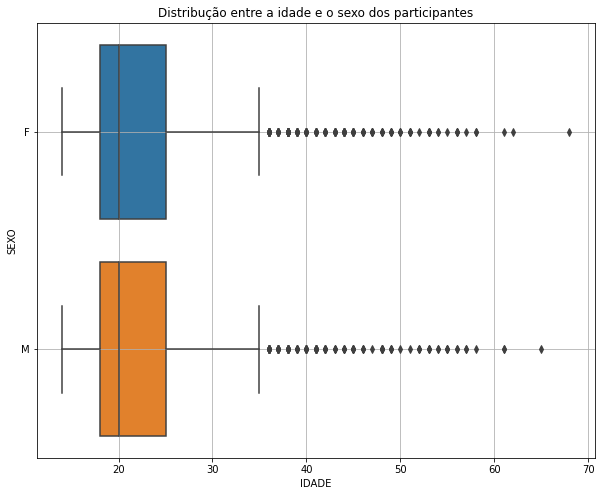

In [71]:
plt.figure(figsize=(10,8))
sns.boxplot(x="NU_IDADE", y="TP_SEXO", data=dados_pb)
plt.title('Distribução entre a idade e o sexo dos participantes')
plt.xlabel('IDADE')
plt.ylabel('SEXO')
plt.grid()
plt.show()

O gráfico acima ilustra bem a análise sobre a distribuição da idade e sexo dos participantes paraibanos. Os retângulos, tanto o azul (F) quanto o laranja (M) estão praticamente iguais, mostrando que existem uma concentração maior de participantes com as idades entre 17 a 25 anos. A média de todas as idades, para ambos os sexos foi de 20 anos. E existe mais participantes do sexo feminino acima dos 60 anos do que participantes do sexo masculino.

In [72]:
dados_pb["TP_SEXO"].value_counts()

F    2160
M    1530
Name: TP_SEXO, dtype: int64

Confirmando a análise anterior, existem bem mais participantes do sexo feminino do que do sexo masculino.

In [73]:
# Cálculo da diferença percentual entre os participantes do sexo M e F

((2160/1530) - 1) * 100

41.176470588235304

Pelo resultado vemos que as participantes do sexo feminino correspondem aproximadamente a 41% a mais que os participantes masculinos.

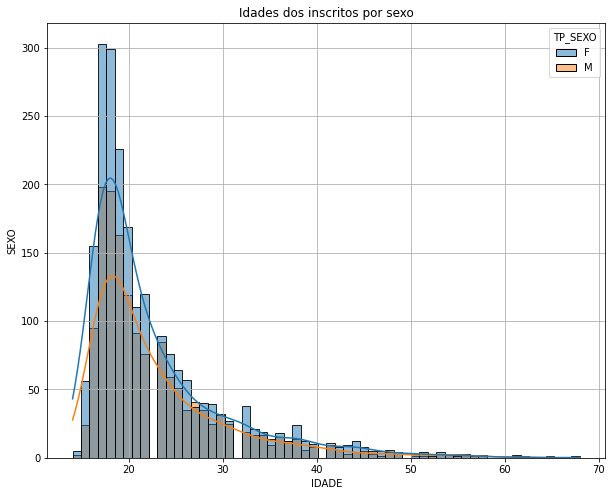

In [74]:
plt.figure(figsize = (10,8))
sns.histplot(data=dados_pb, x="NU_IDADE", hue="TP_SEXO", kde=True)
plt.title('Idades dos inscritos por sexo')
plt.xlabel('IDADE')
plt.ylabel('SEXO')
plt.grid()
plt.show()

Pelo histograma notamos melhor a diferença entre os participantes de sexo M e F.

**5 - Qual a distribuição da idade e sexo dos participantes apenas residentes na capital João Pessoa?**

In [75]:
dados_jp = dados_pb.query("NO_MUNICIPIO_RESIDENCIA == 'João Pessoa'")
dados_jp[{"NU_IDADE", "TP_SEXO"}].value_counts().sort_index()

TP_SEXO  NU_IDADE
F        14           3
         15          16
         16          39
         17          51
         18          60
                     ..
M        52           2
         53           1
         56           1
         58           1
         61           1
Length: 84, dtype: int64

Esse resultado mostra que a capital tem 3 dos participantes mais jovens (14 anos) e a participante mais velha (68 anos).

In [76]:
dados_jp["TP_SEXO"].value_counts()

F    527
M    431
Name: TP_SEXO, dtype: int64

Segue o resultado obtido na análise para toda a Paraíba, existem mais participantes do sexo feminino do que masculino também na capital.

In [77]:
# Cálculo da diferença percentual entre os participantes do sexo M e F

((527/431) - 1) * 100

22.2737819025522

A diferença percentual entre os praticipantes do sexo masculino para o feminino residentes em João Pessoa é de aproximadamente 22%.

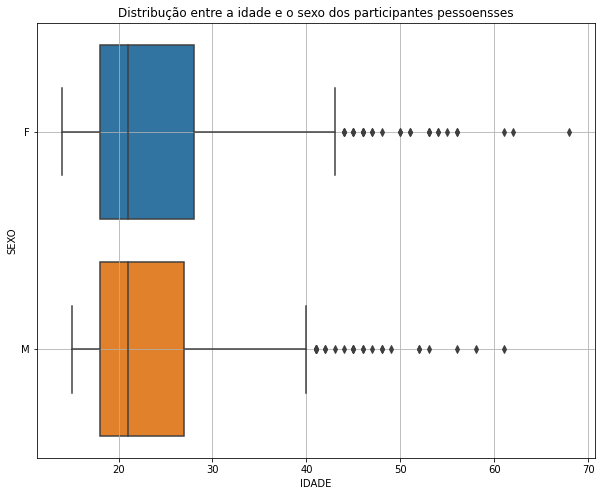

In [78]:
plt.figure(figsize=(10,8))
sns.boxplot(x="NU_IDADE", y="TP_SEXO", data=dados_jp)
plt.title('Distribução entre a idade e o sexo dos participantes pessoensses')
plt.xlabel('IDADE')
plt.ylabel('SEXO')
plt.grid()
plt.show()

Esse resultado mostra uma diferença com o gráfico contendo todos os participantes paraibanos. Olhando apenas para os participantes pessoenses, vemos que as participantes do sexo feminino são ligeiramente a maioria e elas abrangem uma faixa maior na idade entre os 17 e 28 anos, já os participantes do sexo masculino correspondem a uma faixa entre 17 e 26 anos.

Outro ponto que difere do resultado anterior, é que a média de idade dos participantes pessoenses está acima dos 20 anos.

**6 - Qual a distribuição entre cor/raça?**



In [180]:
pb_nao_declarado = dados_pb.query("TP_COR_RACA == 0")
pb_branca = dados_pb.query("TP_COR_RACA == 1")
pb_preta = dados_pb.query("TP_COR_RACA == 2")
pb_parda = dados_pb.query("TP_COR_RACA == 3")
pb_amarela = dados_pb.query("TP_COR_RACA == 4")
pb_indigena = dados_pb.query("TP_COR_RACA == 5")

print(f"Não declarado: {len(pb_nao_declarado)}")
print(f"Branca.......: {len(pb_branca)}")
print(f"Preta........: {len(pb_preta)}")
print(f"Parda........: {len(pb_parda)}")
print(f"Amarela......: {len(pb_amarela)}")
print(f"Indigena.....: {len(pb_indigena)}")

Não declarado: 79
Branca.......: 1040
Preta........: 345
Parda........: 2078
Amarela......: 108
Indigena.....: 40


Chama a atenção nesses resultados a grande quantidade de participantes que se declararam pardos. Haja vista que é comum pessoas pretas que possuem um tom mais claro de pele, tenderem a se enxergarem como pardas ao invés de pretas. Talvez isso explique o baixo número de participantes que se declararam pretas.

Porém, vale ressaltar que segundo o [IBGE](https://pt.wikipedia.org/wiki/Demografia_da_Para%C3%ADba), a demografia da Paraíba tem predominância de pessoas que se declararam pardas (52,7% da população). Levando em conta essa informação, o que os dados do ENEM 2019 revelam coincide com a percepção da população.

**7 - Qual a distribuição entre cor/raça em relação as idades?**

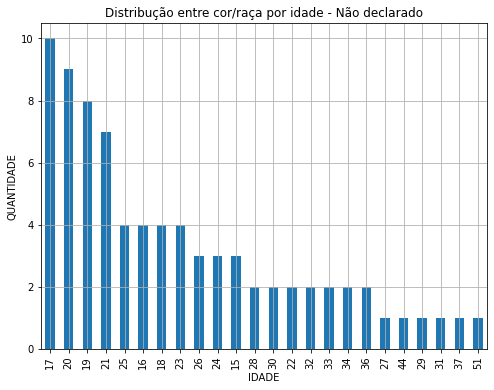

In [80]:
pb_nao_declarado["NU_IDADE"].value_counts().plot.bar(figsize=(8,6), grid=True)
plt.title('Distribução entre cor/raça por idade - Não declarado')
plt.xlabel('IDADE')
plt.ylabel('QUANTIDADE')
plt.show()

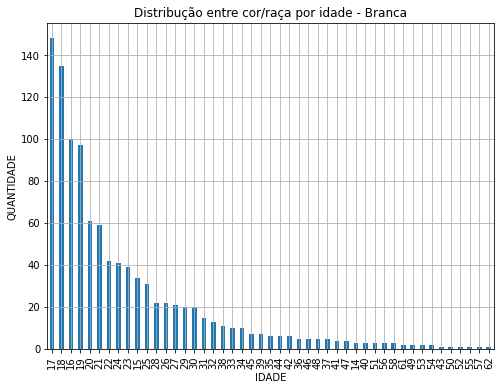

In [81]:
pb_branca["NU_IDADE"].value_counts().plot.bar(figsize=(8,6), grid=True)
plt.title('Distribução entre cor/raça por idade - Branca')
plt.xlabel('IDADE')
plt.ylabel('QUANTIDADE')
plt.show()

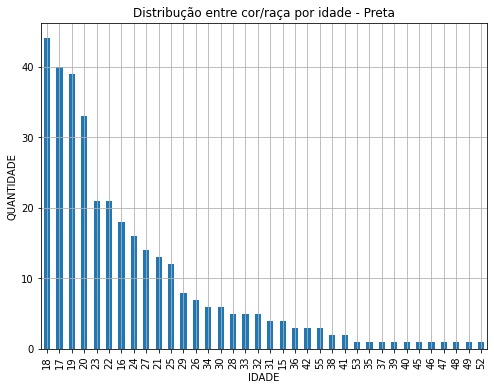

In [82]:
pb_preta["NU_IDADE"].value_counts().plot.bar(figsize=(8,6), grid=True)
plt.title('Distribução entre cor/raça por idade - Preta')
plt.xlabel('IDADE')
plt.ylabel('QUANTIDADE')
plt.show()

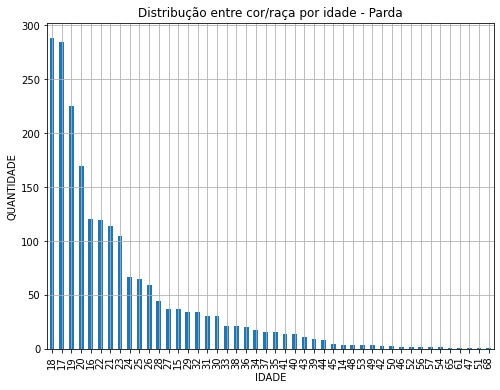

In [83]:
pb_parda["NU_IDADE"].value_counts().plot.bar(figsize=(8,6), grid=True)
plt.title('Distribução entre cor/raça por idade - Parda')
plt.xlabel('IDADE')
plt.ylabel('QUANTIDADE')
plt.show()

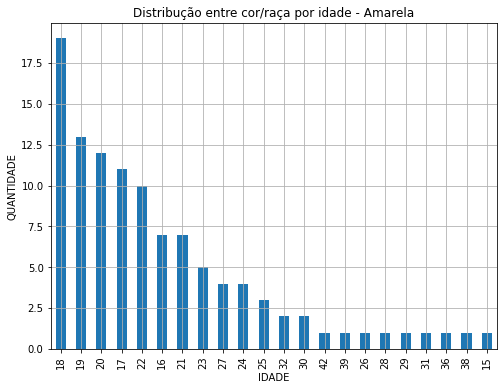

In [84]:
pb_amarela["NU_IDADE"].value_counts().plot.bar(figsize=(8,6), grid=True)
plt.title('Distribução entre cor/raça por idade - Amarela')
plt.xlabel('IDADE')
plt.ylabel('QUANTIDADE')
plt.show()

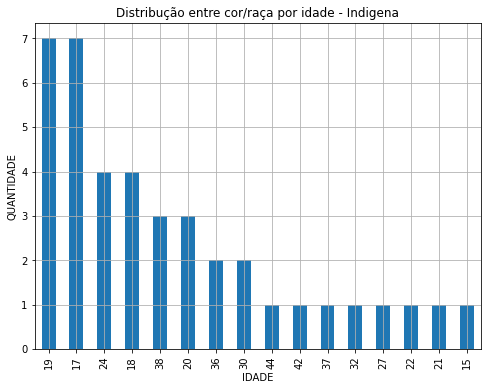

In [85]:
pb_indigena["NU_IDADE"].value_counts().plot.bar(figsize=(8,6), grid=True)
plt.title('Distribução entre cor/raça por idade - Indigena')
plt.xlabel('IDADE')
plt.ylabel('QUANTIDADE')
plt.show()

**8 - Qual a média das notas dos participantes?**

In [86]:
print("Média da prova de Ciências da Natureza")
print(f"Média nacional.: {dados['NU_NOTA_CN'].mean():.2f}") 
print(f"Média paraibana: {dados_pb['NU_NOTA_CN'].mean():.2f}") 

Média da prova de Ciências da Natureza
Média nacional.: 477.96
Média paraibana: 467.06


In [87]:
# Cálculo da diferença percentual entre as médias das notas

((477.96/467.06) - 1) * 100

2.333747270158004

In [88]:
print("Média da prova de Ciências Humanas")
print(f"Média nacional.: {dados['NU_NOTA_CH'].mean():.2f}") 
print(f"Média paraibana: {dados_pb['NU_NOTA_CH'].mean():.2f}") 

Média da prova de Ciências Humanas
Média nacional.: 507.37
Média paraibana: 497.36


In [89]:
# Cálculo da diferença percentual entre as médias das notas

((507.37/497.36) - 1) * 100

2.0126266688113237

In [90]:
print("Média da prova de Linguagens e Códigos")
print(f"Média nacional.: {dados['NU_NOTA_LC'].mean():.2f}") 
print(f"Média paraibana: {dados_pb['NU_NOTA_LC'].mean():.2f}") 

Média da prova de Linguagens e Códigos
Média nacional.: 520.46
Média paraibana: 510.70


In [91]:
# Cálculo da diferença percentual entre as médias das notas

((520.46/510.70) - 1) * 100

1.9111024084589978

In [92]:
print("Média da prova de Matemática")
print(f"Média nacional.: {dados['NU_NOTA_MT'].mean():.2f}") 
print(f"Média paraibana: {dados_pb['NU_NOTA_MT'].mean():.2f}") 

Média da prova de Matemática
Média nacional.: 523.56
Média paraibana: 508.43


In [93]:
# Cálculo da diferença percentual entre as médias das notas

((523.56/508.43) - 1) * 100

2.9758275475483265

In [94]:
print("Média da Redação")
print(f"Média nacional.: {dados['NU_NOTA_REDACAO'].mean():.2f}")
print(f"Média paraibana: {dados_pb['NU_NOTA_REDACAO'].mean():.2f}")

Média da Redação
Média nacional.: 571.57
Média paraibana: 576.89


In [95]:
# Cálculo da diferença percentual entre as médias das notas

((576.89/571.57) - 1) * 100

0.9307696345154381

Os resultados acima mostram que os participantes paraibanos ficaram com uma média das notas bem próxima da média nacional, com diferença na casa dos 2%. Sendo que na prova de Matemática foi a que chegou próximo dos 3% a diferença da média.

O resultado positivo foi que apesar de pouco, apenas quase 1% de diferença, os participantes paraibanos obtiveram uma média maior na Redação do que a média dos participantes nacionais.

**9 - Qual a renda dos partipantes?**

In [96]:
renda_ordenada = dados['Q006'].unique()
renda_ordenada.sort()
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

Para referência:

* A = Nenhuma renda
* B = Até 998,00 Reais
* C = De 998,01 até 1.497,00 Reais
* D = De 1.497,01 até 1.996,00 Reais
* E = De 1.996,01 até 2.495,00 Reais
* F = De 2.495,01 até 2.994,00 Reais
* G = De 2.994,01 até 3.992,00 Reais
* H = De 3.992,01 até 4.990,00 Reais
* I = De 4.990,01 até 5.988,00 Reais
* J = De 5.988,01 até 6.986,00 Reais
* K = De 6.986,01 até 7.984,00 Reais
* L = De 7.984,01 até 8.982,00 Reais
* M = De 8.982,01 até 9.980,00 Reais
* N = De 9.980,01 até 11.976,00 Reais
* O = De 11.976,01 até 14.970,00 Reais
* P = De 14.970,01 até 19.960,00 Reais
* Q = Mais de 19.960,00 Reais

In [ ]:
renda_m = dados_pb.query("TP_SEXO == 'M'")["Q006"].value_counts().sort_index()
renda_f = dados_pb.query("TP_SEXO == 'F'")["Q006"].value_counts().sort_index()

In [177]:
# Renda dos particpantes do sexo masculino
renda_m

A    104
B    507
C    393
D    128
E    119
F     60
G     79
H     29
I     31
J     19
K      8
L      6
M     12
N      4
O     10
P      8
Q     13
Name: Q006, dtype: int64

In [178]:
# Renda das particpantes do sexo feminino
renda_f

A    202
B    894
C    539
D    135
E    122
F     47
G     66
H     38
I     25
J     18
K     12
L     14
M      6
N     10
O     17
P      7
Q      8
Name: Q006, dtype: int64

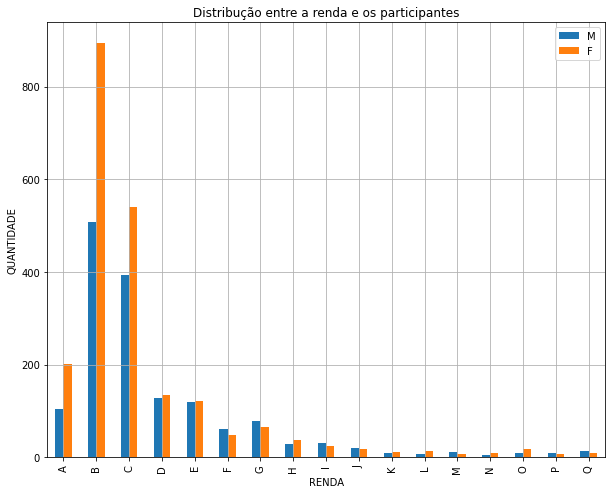

In [176]:
df = pd.DataFrame({'M': renda_m,
                   'F': renda_f})

df.plot.bar(figsize=(10,8), grid=True)
plt.title('Distribução entre a renda e os participantes')
plt.xlabel('RENDA')
plt.ylabel('QUANTIDADE')
plt.show()

Os dados acima mostram que as participantes paraibanos ocupam mais a faixa de renda que vai desde 998,00 Reais até 1.497,00 Reais (letras B e C). E outro detalhe que se nota é que nas faixas de maiores rendas (letras P e Q) são os participantes do sexo masculino que aparecem mais.




# Parte 2 - Machine Learning

Nessa parte será utilizado um algoritmo de machine learning para prever a nota de redaçao dos participantes paraibanos usando como base as notas das demais matérias.

1.   Item da lista
2.   Item da lista



In [181]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
dados_pb["NU_NOTA_TOTAL"] = dados_pb[provas].sum(axis=1)
dados_pb.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
8429,190001336089,2019,2511202,Pedras de Fogo,25,PB,17,F,1,3,1,2511202.0,Pedras de Fogo,25.0,PB,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,BBDED99999ADCBACEECDCBECADDCEACABDDDADEDECACEB...,EACDAEBCDAEBACEABAECDABBBCDAEEACDBCEACEABDDCE,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,160.0,160.0,180.0,100.0,740.0,B,E,C,B,7,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2343.8
8598,190001343250,2019,2513158,Santa Cecília,25,PB,18,M,1,1,1,3548708.0,São Bernardo do Campo,35.0,SP,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,A,4,B,A,B,A,A,B,B,B,B,A,A,A,A,B,A,A,C,A,A,B,0.0
8699,190001346815,2019,2511202,Pedras de Fogo,25,PB,23,M,1,3,1,2611606.0,Recife,26.0,PE,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,F,F,F,5,C,A,B,D,A,B,B,A,A,A,B,A,A,C,A,A,D,A,A,B,0.0
9007,190001360033,2019,2507903,Juripiranga,25,PB,20,F,1,3,1,3304557.0,Rio de Janeiro,33.0,RJ,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CBAAEBCEABEDBECDACECBAEEDDCDCCBEBAACDBAEC...,CBAEADAEBCCBABCBAD*DCCCADAEDCACBCBDCACBEAEDBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,140.0,160.0,160.0,160.0,120.0,740.0,D,B,A,C,5,A,A,C,D,A,A,B,A,A,A,A,A,A,B,B,A,E,A,A,B,2907.2
9435,190001378185,2019,2517001,Umbuzeiro,25,PB,25,F,1,3,0,NaN,NaN,NaN,NaN,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,3,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,0.0


In [183]:
dados_sem_nota_zero = dados_pb.query('NU_NOTA_TOTAL != 0')
dados_sem_nota_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
8429,190001336089,2019,2511202,Pedras de Fogo,25,PB,17,F,1,3,1,2511202.0,Pedras de Fogo,25.0,PB,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,BBDED99999ADCBACEECDCBECADDCEACABDDDADEDECACEB...,EACDAEBCDAEBACEABAECDABBBCDAEEACDBCEACEABDDCE,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,160.0,160.0,180.0,100.0,740.0,B,E,C,B,7,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2343.8
9007,190001360033,2019,2507903,Juripiranga,25,PB,20,F,1,3,1,3304557.0,Rio de Janeiro,33.0,RJ,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CBAAEBCEABEDBECDACECBAEEDDCDCCBEBAACDBAEC...,CBAEADAEBCCBABCBAD*DCCCADAEDCACBCBDCACBEAEDBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,140.0,160.0,160.0,160.0,120.0,740.0,D,B,A,C,5,A,A,C,D,A,A,B,A,A,A,A,A,A,B,B,A,E,A,A,B,2907.2
11324,190001454976,2019,2504009,Campina Grande,25,PB,24,F,1,1,1,2504009.0,Campina Grande,25.0,PB,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BEBBEDBDBAAECCEEDDADAABBCEDDCBDEAEAADEEDB...,DAAACBDBDDACADAABCEBCBBAAAAEAACDEBCCEAEABDABA,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,120.0,120.0,100.0,0.0,460.0,B,A,A,A,3,B,A,B,D,B,A,B,A,A,A,A,A,A,C,B,A,D,A,B,B,2085.7
11325,190001455029,2019,2512903,Rio Tinto,25,PB,24,M,1,3,1,3525904.0,Jundiaí,35.0,SP,2,0,2,1.0,0,25087908.0,2512903.0,Rio Tinto,25.0,PB,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,99999DCDEABEBEB*BECCEBBDADAABAEEEBEEDDCEECABCE...,DECACCBCBAAADADCABAAAEEABCACBCADAAABAEBDECABB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,100.0,100.0,120.0,560.0,B,B,B,B,5,B,A,B,D,A,A,B,A,A,A,A,A,A,B,B,A,C,A,A,A,2333.0
11326,190001455034,2019,2507507,João Pessoa,25,PB,18,F,1,3,1,2507507.0,João Pessoa,25.0,PB,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BEDAAAEDBBCEECDACBEBAADBBEACBAAADAAECCEBD...,ABEECEBBACDAECCBAADEDACAACBAADCDBBDDAECCEACEC,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,100.0,80.0,80.0,480.0,E,E,F,B,4,C,A,B,C,A,A,B,A,A,A,B,A,A,C,B,B,B,B,A,B,2271.5


In [184]:
provas_entrada = ["NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_CN", "NU_NOTA_MT"]
provas_saida = "NU_NOTA_REDACAO"

dados_sem_nota_zero = dados_sem_nota_zero[provas].dropna() # retira os NaN

notas_entrada = dados_sem_nota_zero[provas_entrada]
notas_saida = dados_sem_nota_zero[provas_saida]

notas_entrada

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_MT
8429,377.0,480.3,346.1,400.4
9007,550.9,567.7,534.1,514.5
11324,365.7,486.3,345.2,428.5
11325,444.2,435.7,439.3,453.8
11326,479.3,478.9,391.1,442.2
...,...,...,...,...
127317,428.5,454.5,478.0,403.0
127318,612.6,553.9,521.0,748.4
127349,384.5,522.2,451.6,501.9
127370,372.5,475.1,477.5,437.6


In [195]:
x = notas_entrada
y = notas_saida

SEED = 1234 # esse parâmetro é passado para evitar a randomização dos resultados
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=SEED)

x_treino.head()

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_MT
73182,522.1,552.8,438.6,484.4
11683,623.7,613.5,582.0,637.4
42298,448.1,378.1,370.8,369.8
12731,364.5,484.6,403.4,409.7
11324,365.7,486.3,345.2,428.5


In [188]:
# Treino do modelo utilizado

modelo_linearSVR = LinearSVR(random_state=SEED)
modelo_linearSVR.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=1234, tol=0.0001, verbose=0)

In [189]:
predicoes_redacao = modelo_linearSVR.predict(x_teste)

In [190]:
# Resultado aproximado obtido pela regressão

y_teste[:5]

11818     500.0
100678    780.0
43983     860.0
43662     740.0
11412     380.0
Name: NU_NOTA_REDACAO, dtype: float64

(-50.0, 1050.0)

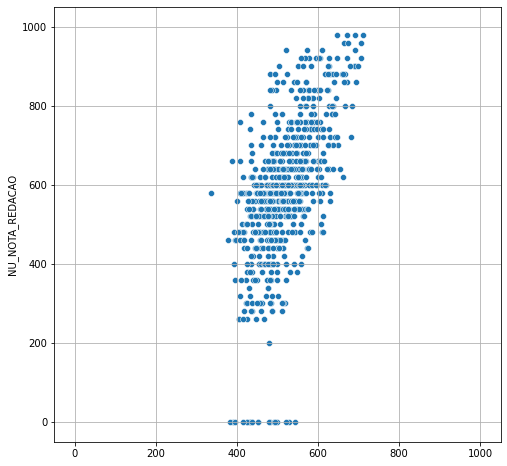

In [191]:
plt.figure(figsize=(8, 8))
plt.grid()
sns.scatterplot(x=predicoes_redacao, y=y_teste)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

O gráfico acima mostra que numa primeira predição utilizando as notas das demais disciplinas para "advinhar" a nota de redação, o modelo de machine learning utilizado aproximou mais das notas reais (eixo y) entre as notas 400 e 600.

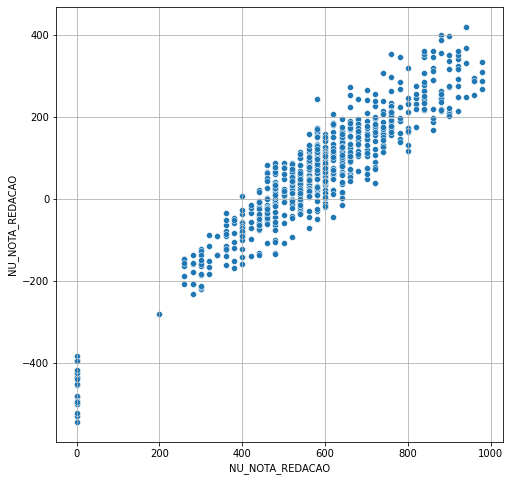

In [192]:
# Visualização do erro entre os dados reais e a predição

plt.figure(figsize=(8, 8))
plt.grid()
sns.scatterplot(x=y_teste, y=y_teste - predicoes_redacao)

Segundo esse gráfico, na medida em que as notas aumentavam (eixo x), maior era o erro da predição (eixo y). Além disso, também houve um aumento do erro na predição para as notas menores.

A tabela abaixo mostra de forma quantitativa e eficiência da regressão e dos resultados obtidos.

In [193]:
resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados["Previsao"] = predicoes_redacao
resultados["Diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["Diferenca²"] = (resultados["Real"] - resultados["Previsao"])**2

resultados

,Real,Previsao,Diferenca,Diferenca²
11818,500.0,492.603862,7.396138,54.702850
100678,780.0,590.401224,189.598776,35947.695761
43983,860.0,569.975845,290.024155,84114.010276
43662,740.0,525.465486,214.534514,46025.057712
11412,380.0,437.544811,-57.544811,3311.405238
...,...,...,...,...
114953,0.0,395.086508,-395.086508,156093.349147
30303,840.0,480.786757,359.213243,129034.154152
101247,640.0,512.612131,127.387869,16227.669141
86132,680.0,513.591686,166.408314,27691.726896


In [194]:
# Cálculo do erro médio quadrático do modelo utilizado

mean_squared_error(y_teste, predicoes_redacao)

26339.635702195123

O modelo de machine learning utilizado (LinearSVR) não se mostrou tão eficaz assim para "prever" a nota de redação dos participantes. Um dos problemas pode ser o baixo número de amostras, o que poderia melhorar o treino do modelo.

